In [4]:
import numpy as np
import tifffile as tif
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# Load and preprocess your data

docker_folder_snca = '/tf/notebooks/home/hcleroy/PostDoc/Colab_David/ExperimentalData/Processed_Cell_Crops/a-Synuclein_Channel/'
SNCAfiles = ['Cell'+str(i)+'_ROI'+str(i)+'_SNCA.tif' for i in range(1,11)]
docker_folder_mask = "/tf/notebooks/home/hcleroy/PostDoc/Colab_David/ExperimentalData/Processed_Cell_Crops/mask/"
cell_mask = ['cell'+str(i)+'.tiff' for i in range(10)]

snca = [tif.imread(docker_folder_snca + file) for file in SNCAfiles]
print([stack.shape for stack in snca])
snca = [tf.image.resize(stack[:, :, :, np.newaxis], (150, 150)) for stack in snca]
snca = np.array([img for stack in snca for img in stack], dtype=np.float32)
snca /= 255.0  # Normalize pixel values to [0, 1]

cells = [tif.imread(docker_folder_mask + file) for file in cell_mask]
cells = [tf.image.resize(stack[:, :, :, np.newaxis], (150, 150)) for stack in cells]
cells = np.array([img for stack in cells for img in stack], dtype=np.float32)
cells /= 255.0  # Normalize pixel values to [0, 1]


[(30, 134, 134), (12, 141, 141), (11, 154, 154), (17, 97, 97), (14, 124, 124), (17, 135, 135), (12, 116, 116), (10, 98, 98), (13, 187, 187), (10, 112, 112)]


In [30]:

# Define data augmentation parameters
data_gen_args = dict(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    zca_whitening=False
)

# Create ImageDataGenerator instances
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to the dataset
image_datagen.fit(snca)
#mask_datagen.fit(cells)

In [36]:
ImageDataGenerator?

Init signature:
ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None,
)
Docstring:     
Generate batches of tensor image data with real-time data augmentation.

Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
recommended for new code. Prefer loading images with
`tf.keras.utils.image_dataset_from_directory` and transforming the output
`tf.data.Dataset` with preprocessing layers. For more information, see the
tutoria

In [31]:
# Create data generators
seed = 1
image_generator = image_datagen.flow(snca, batch_size=5, seed=seed)
mask_generator = mask_datagen.flow(cells, batch_size=5, seed=seed)

In [34]:
image_generator

In [32]:
# Visualize a few augmented images and masks
def visualize_augmentation(image_gen, mask_gen, num_examples=3):
    fig, axes = plt.subplots(num_examples, 2, figsize=(10, num_examples * 5))
    for i in range(num_examples):
        img = next(image_gen)[0]  # Get a single image from the generator
        mask = next(mask_gen)[0]  # Get a single mask from the generator
        axes[i, 0].imshow(img[:, :, 0], cmap='gray')
        axes[i, 0].set_title("Augmented Image")
        axes[i, 1].imshow(mask[:, :, 0], cmap='gray')
        axes[i, 1].set_title("Augmented Mask")
        axes[i, 0].axis('off')
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

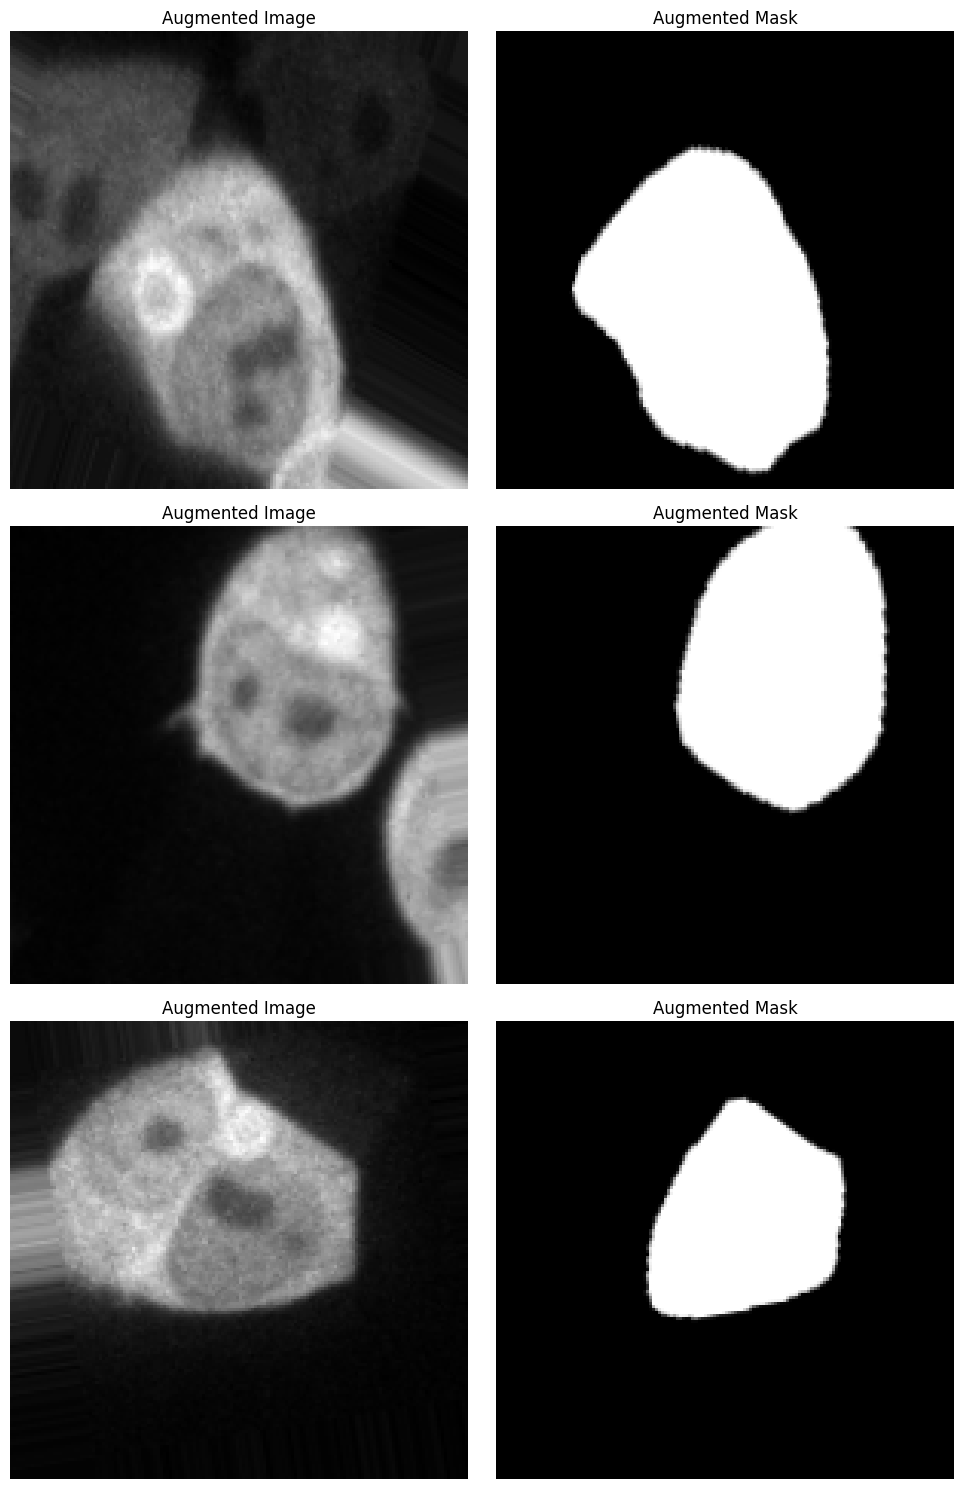

In [33]:
visualize_augmentation(image_generator, mask_generator)